In [1]:
import sys
import os
import subprocess
sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from generate_in_file import generate_in_file
from generate_exp import generate_in_file_test

In [2]:
generate_in_file_test(
    output_dir="2D_pore_in_files",  # Каталог для сохранения файлов
    D = 20,
    L_pore = 10,
    L_wall = 20,
    space = 10,
    N = 50,
    S = 70,
    Cs = 0.01,
    valence = -0.5, 
    chi_surf = -0.55,
    chi_solv = 0.5
)

Расчет параметров

In [3]:
# Путь к целевой папке
target_directory = "/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates"
os.makedirs(target_directory, exist_ok=True)  # Создаём папку, если её нет

# Полный путь к файлу
output_path = os.path.join(target_directory, "2d_pore.in")

# Вызов функции
generate_in_file(output_path, D = 20, L_pore = 20, L_wall = 10, space = 10, N = 60, S = 70, Cs = 0.005, valence = -0.5)

In [4]:
subprocess.call(['namics', os.path.abspath(output_path)])

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.348399e+00 |g| = 2.535320e+00 alpha = 1.000000e+00 
hessian scaling: 0.319888
it =  1  E = 1.256929e+00 |g| = 2.423318e+00 alpha = 1.394428e-01 
it =  2  E = 2.255276e+00 |g| = 2.347894e+00 alpha = 3.874852e-02 
it =  3  E = 2.565286e+00 |g| = 2.287303e+00 alpha = 2.712861e-02 
it =  4  E = 2.878064e+00 |g| = 2.253716e+00 alpha = 1.986083e-02 
it =  5  E = 3.336087e+00 |g| = 2.224095e+00 alpha = 1.368570e-02 
it =  6  E = 3.666414e+00 |g| = 2.205812e+00 alpha = 1.057875e-02 
it =  7  E = 3.942042e+00 |g| = 2.186972e+00 alpha = 8.562897e-03 
it =  8  E = 4.138470e+00 |g| = 2.173411e+00 alpha = 7.307306e-03 
it =  9  E = 4.206315e+00 |g| = 2.158829e+00 alpha = 6.665555e-03 
it =  10  E = 4.306624e+00 |g| = 2.147084e+0

0

In [5]:
print(2 * 3.14 * 10 * 50 * (1/70))

44.857142857142854


In [6]:
import pandas as pd

file_path = '/home/tpopova/prj/PB_SCF/08_2D_pore/Figures/output/2d_pore.pro'

# Открываем файл и читаем все строки
with open(file_path, 'r') as file:
    lines = file.readlines()

# Проверим количество столбцов в первой строке (заголовке)
header = lines[0].strip().split("\t")
print(f"Число столбцов в заголовке: {len(header)}")

# Очищаем данные, удаляя лишние столбцы, если их больше
cleaned_lines = []
for line in lines[1:]:
    columns = line.strip().split("\t")
    if len(columns) > len(header):
        columns = columns[:len(header)]  # Убираем лишние столбцы
    cleaned_lines.append("\t".join(columns))

# Теперь читаем очищенные данные в DataFrame
cleaned_file_path = '/home/tpopova/prj/PB_SCF/08_2D_pore/Figures/output/cleaned_2d_pore.pro'
with open(cleaned_file_path, 'w') as file:
    # Записываем заголовок
    file.write("\t".join(header) + "\n")
    # Записываем очищенные данные
    file.writelines("\n".join(cleaned_lines))

# Читаем очищенные данные в pandas DataFrame
df = pd.read_csv(cleaned_file_path, sep="\t")

# # Проверяем результат
# print(df.head())
# print(f"Число строк: {df.shape[0]}")
# print(f"Число столбцов: {df.shape[1]}")


Число столбцов в заголовке: 24


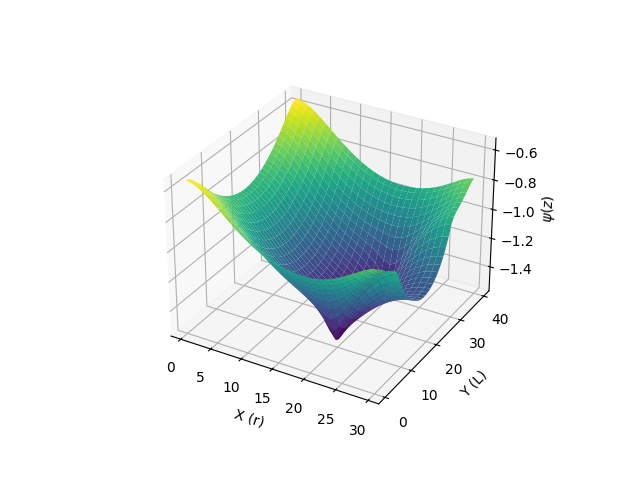

In [9]:
%matplotlib widget


x = df['x']
y = df['y']
z = df['sys_noname_psi']

# Создаем сетку для осей X и Y
x_grid, y_grid = np.meshgrid(np.unique(x), np.unique(y))

# Интерполяция значений Z для каждой точки сетки
z_grid = griddata((x, y), z, (x_grid, y_grid), method='linear')

# Создаем фигуру для 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Строим поверхность
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Добавляем метки осей
ax.set_xlabel('X (r)')
ax.set_ylabel('Y (L)')
ax.set_zlabel('$\\psi(z)$')

# Показываем график
plt.show()

In [8]:
# psi = df['sys_noname_psi']
# x = df['x']
# # phi_brush = pd.read_csv(file, sep='\t')['mol_brush_phi']
# # phi_end_brush = pd.read_csv(file, sep='\t')['mon_G_phi']

# plt.plot(x, psi)